In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
%matplotlib inline

In [3]:
# import statements
import sqlite3
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 16

#### Warmup 1: Write a function that converts any Fehrenheit temp to Celcius
C = (5/9) * (f-32)

In [4]:
def f_to_c(f):
    return (5/9) * (f-32)

# test it by making several calls
print(f_to_c(212))
print(f_to_c(32))
print(f_to_c(67))

100.0
0.0
19.444444444444446


#### Warmup 2a: What is the name of the only table inside of iris-flowers.db?

In [5]:
iris_conn = sqlite3.connect("iris-flowers.db")
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", iris_conn)

,type,name,tbl_name,rootpage,sql
0,table,iris,iris,2,"CREATE TABLE ""iris"" (\n""sep-length"" REAL,\n ""..."


#### Warmup 2b: Save & display all the data from this table to a variable called "iris_df"

In [6]:
iris_df = pd.read_sql("SELECT * FROM iris", iris_conn)
iris_df

,sep-length,sep-width,pet-length,pet-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Warmup 3: Scatter plot to visualize relationship between `pet-width` and `pet-length`

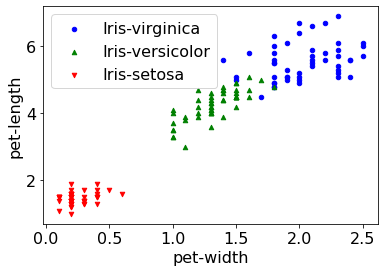

In [7]:
# complete this code to make 3 plots in one

colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]

# getting unique class column values
varietes = list(set(iris_df["class"]))

plot_area = None
for i in range(len(varietes)):
    variety = varietes[i]
    
    # make a df just of just the data for this variety
    variety_df = iris_df[iris_df["class"] == variety] 
    
    #make a scatter plot for this variety
    plot_area = variety_df.plot.scatter(x = "pet-width", y = "pet-length", \
                                        label = variety, color = colors[i],
                                        marker = markers[i], \
                                        ax = plot_area)

#### Let's focus on "Iris-virginica" data

In [8]:
iris_virginica = iris_df[iris_df["class"] == "Iris-virginica"]
assert(len(iris_virginica) == 50)
iris_virginica.head()

,sep-length,sep-width,pet-length,pet-width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


#### Create scatter plot to visualize relationship between `pet-width` and `pet-length`

<AxesSubplot:xlabel='pet-width', ylabel='pet-length'>

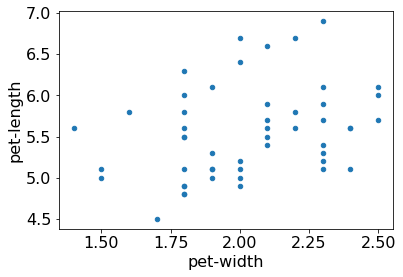

In [9]:
iris_virginica.plot.scatter(x = "pet-width", y = "pet-length")

### Let's learn about *xlim* and *ylim*
- Allows us to set x-axis and y-axis limits
- Takes either a single value (LOWER-BOUND) or a tuple containing two values (LOWER-BOUND, UPPER-BOUND)
- You need to be careful about setting the UPPER-BOUND

<AxesSubplot:xlabel='pet-width', ylabel='pet-length'>

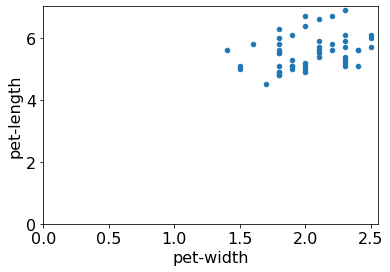

In [10]:
iris_virginica.plot.scatter(x = "pet-width", y = "pet-length", xlim = 0, ylim = 0)

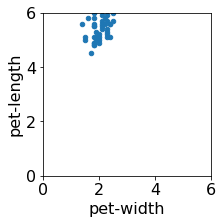

In [11]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                    xlim = (0, 6), ylim = (0, 6),
                    figsize = (3, 3))

# What is wrong with this plot?

What is the maximum `pet-length`?

In [12]:
# How do we extract `pet-length` column Series?
iris_virginica["pet-length"].max()

6.9

For every set method, there is a corresponding get method. Try `ax.get_ylim()`.

In [13]:
ax.get_ylim()

(0.0, 6.0)

Let's include assert statements to make sure we don't crop the plot!

Ran into AssertionError while checking axes limits


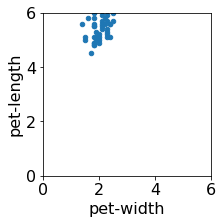

In [14]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                     xlim = (0, 6), ylim = (0, 6),
                     figsize = (3, 3))
try:
    assert iris_virginica["pet-length"].max() <= ax.get_ylim()[1]
except AssertionError:
    print("Ran into AssertionError while checking axes limits")

### Now let's try all 4 assert statements

```
assert iris_virginica[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert iris_virginica[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert iris_virginica[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert iris_virginica[ax.get_ylabel()].max() <= ax.get_ylim()[1]
```

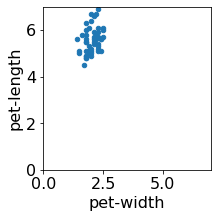

In [15]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                     xlim = (0, 7), ylim = (0, 7),
                     figsize = (3, 3))
assert iris_virginica[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert iris_virginica[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert iris_virginica[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert iris_virginica[ax.get_ylabel()].max() <= ax.get_ylim()[1]

In [16]:
# Close the database connection.
iris_conn.close()

# Plotting Applications

**Learning Objectives**

- Make a line plot on a series or on a DataFrame
- Apply features of line plots and bar plots to visualize results of data investigations
- Clean Series data by dropping NaN values and by converting to int
- Make a stacked bar plot

## Line plots
- `SERIES.plot.line()`       each value in the Series becomes y-value and each index becomes x-value
- `DATAFRAME.plot.line()`    each column in the data frame becomes a line in the plot
- ***IMPORTANT***: lines in line plots shouldn't be crooked, you need to sort the values based on increasing order of indices!

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html

### Plotting line from a Series

<AxesSubplot:>

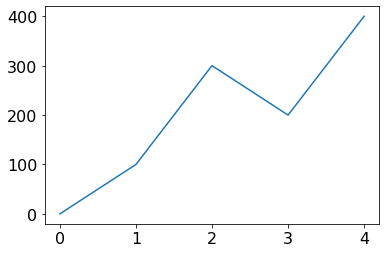

In [17]:
# when you make a series from a list, the default indices 0, 1, 2, ...
s = Series([0, 100, 300, 200, 400])
s.plot.line()

<AxesSubplot:>

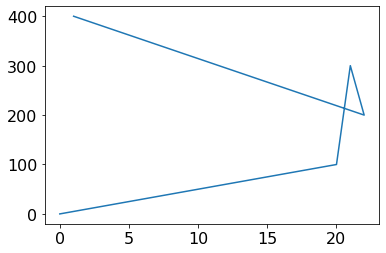

In [18]:
s = Series([0, 100, 300, 200, 400], index = [0, 20, 21, 22, 1])
s.plot.line() # oops this produces a crooked line plot!

<AxesSubplot:>

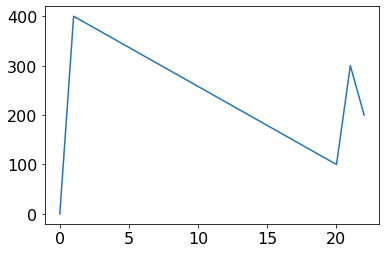

In [19]:
# Let's fix it by sorting the Series values based on the indices
s.sort_index().plot.line()

### Craft breweries example

Text(0, 0.5, '# Craft Breweries')

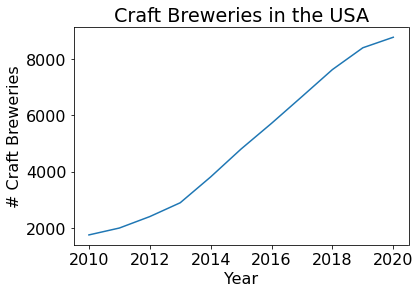

In [20]:
# You can make a series from a list and add indices
s = Series([1758, 2002, 2408, 2898, 3814, 4803, 5713, 6661, 7618, 8391, 8764], \
           index=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
# We can save the AxesSubplot and "beautify" it like the other plots...
ax = s.plot.line()
ax.set_title("Craft Breweries in the USA")
ax.set_xlabel("Year")
ax.set_ylabel("# Craft Breweries")

<AxesSubplot:>

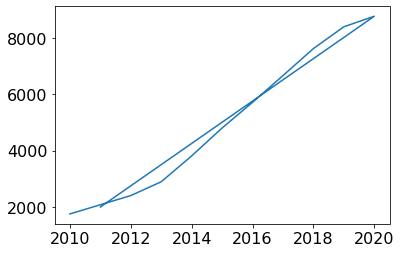

In [21]:
# Be careful! If the indices are out of order you get a mess
# pandas plots each (index, value) in the order given
s = Series([1758, 2408, 2898, 3814, 4803, 5713, 6661, 7618, 8391, 8764, 2002], \
           index=[2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2011])
# TODO: fix this crooked line plot
s.plot.line()

<AxesSubplot:>

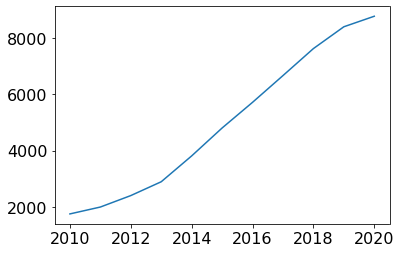

In [22]:
# Fix: call sort_index()
s.sort_index().plot.line()

### Temperature example
Plotting lines from a DataFrame

- `DATAFRAME.plot.line()`    each column in the data frame becomes a line in the plot
- ***IMPORTANT***: lines in line plots shouldn't be crooked, you need to sort the values based on increasing order of indices!

In [23]:
# This DataFrame is made using a dict of lists
# City of Madison normal high and low (degrees F) by month
temp_df = DataFrame( {
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]}
)

# Q: do "high" and "low" become rows or columns within the DataFrame? 
# A: columns
temp_df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


<AxesSubplot:>

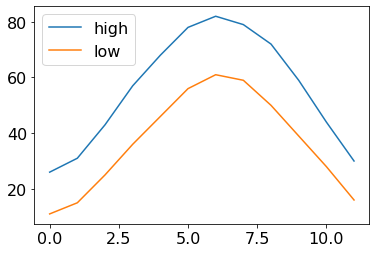

In [24]:
# Let's create line plots
temp_df.plot.line() # not a nice plot

### A Line Plot made from a DataFrame automatically plots all columns

The same is true for bar plots; we'll see this later.

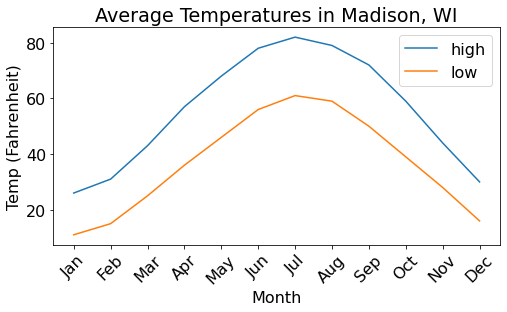

In [25]:
# You can also add ticks and ticklabels to a line plot

ax = temp_df.plot.line(figsize = (8, 4))
ax.set_title("Average Temperatures in Madison, WI")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")
ax.set_xticks(range(12))   # makes a sequence of integers from 0 to 11
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation = 45)

# This gets rid of the weird output
None

Text(0, 0.5, 'Temp (Fahrenheit)')

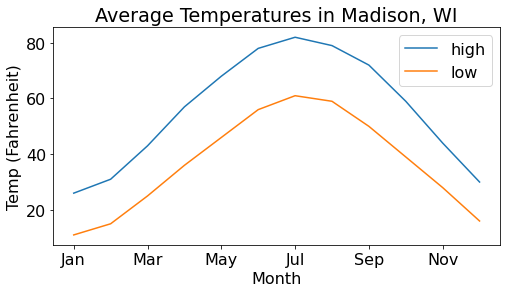

In [26]:
# We could explicitly pass arguments to the "x" and "y" parameters
temp_df_with_month = DataFrame( 
    {
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]}
)

ax = temp_df_with_month.plot.line(x = "month", y = ["high", "low"], figsize = (8, 4))
ax.set_title("Average Temperatures in Madison, WI")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")

### We can perform a calculation on an entire DataFrame
Let's change the entire DataFrame to Celcius

In [27]:
# call the function on the dataframe
celcius_df = f_to_c(temp_df)
celcius_df

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778
5,25.555556,13.333333
6,27.777778,16.111111
7,26.111111,15.000000
8,22.222222,10.000000
9,15.000000,3.888889


In [28]:
# here is one way to add a horizontal line to our line plots
celcius_df["freezing"] = 0
celcius_df

,high,low,freezing
0,-3.333333,-11.666667,0
1,-0.555556,-9.444444,0
2,6.111111,-3.888889,0
3,13.888889,2.222222,0
4,20.000000,7.777778,0
5,25.555556,13.333333,0
6,27.777778,16.111111,0
7,26.111111,15.000000,0
8,22.222222,10.000000,0
9,15.000000,3.888889,0


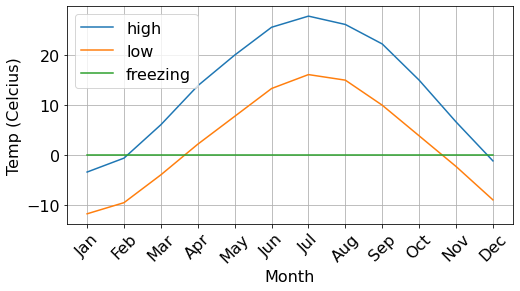

In [29]:
# this plots each column as lines
# with rotation for the tick labels
ax = celcius_df.plot.line(figsize = (8, 4))
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")
ax.set_xticks(range(12))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation = 45)
ax.grid()
None

## Bar plots using DataFrames

Bar Plot Example w/ Fire Hydrants

- General review of pandas
- Some new bar plot options

In [30]:
# TODO: read "Fire_Hydrants.csv" into a DataFrame
hdf = pd.read_csv("Fire_Hydrants.csv")
hdf.tail()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
10104,-89.439367,43.040481,286329,WUJAG,2018-08-13T18:03:33.000Z,WUJAG,2018-08-13T18:04:02.000Z,HYDR-3964-4053,TC,1-1830-19,...,NaN,WATEROUS,NaN,2018.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10105,-89.426303,43.067854,286330,WUJAG,2018-08-13T18:14:14.000Z,WUJAG,2018-08-13T18:17:45.000Z,HYDR-4253-4054,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10106,-89.445461,43.053305,286729,WUJAG,2018-08-15T16:37:18.000Z,WUJAG,2018-08-15T16:39:24.000Z,HYDR-3859-4055,TC,1-1830-19,...,NaN,WATEROUS,NaN,2000.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10107,-89.388849,43.068576,286730,WUJAG,2018-08-15T16:51:54.000Z,WUJAG,2018-08-15T16:59:15.000Z,HYDR-5052-4056,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10108,-89.518896,43.062062,287129,WUJAG,2018-08-20T18:54:01.000Z,WUJAG,2018-08-20T19:27:16.000Z,-2355-4057,FASB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN


In [31]:
# Extract just the column names
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

In [32]:
# Make a series called counts_series which stores the value counts of the "nozzle_color"
color_counts = hdf["nozzle_color"].value_counts()
color_counts # what is wrong with this data?

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
green        9
Red          9
orange       4
GREEN        1
white        1
C            1
ORANGE       1
Name: nozzle_color, dtype: int64

In [33]:
# TODO: Clean the data ......use str.upper()

color_counts = hdf["nozzle_color"].str.upper().value_counts()
color_counts

BLUE      7003
GREEN      330
ORANGE      79
RED          9
WHITE        1
C            1
Name: nozzle_color, dtype: int64

Text(0.5, 0, 'Fire hydrant count')

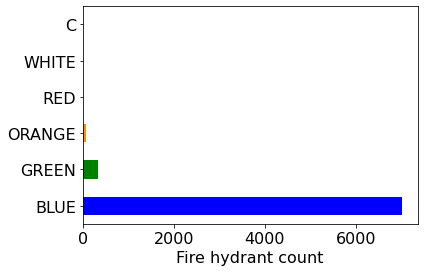

In [34]:
# Make a horizontal bar plot of counts of colors and have the colors match
# use color list: ["b", "g", "darkorange", "r", "c", "0.5"]
ax = color_counts.plot.barh(color = ["b", "g", "darkorange", "r", "c", "0.5"])
ax.set_xlabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

In [35]:
# Do the same thing as we did for the colors but this time for the "Style"
style_counts = hdf["Style"].str.upper().value_counts()
style_counts

PACER                      3620
M-3                        1251
MUELLER                    1243
WB-59                       664
K-11                        351
K-81                        162
W-59                        151
CLOW 2500                   123
CLOW MEDALLION               70
CLOW                         50
CENTURIAN                    35
EDDY                         27
MUELLER 90                   13
MUELLER 86                   13
MUELLER SUPER CENTURIAN      12
MUELLER 92                   12
MUELLER 93                   11
MUELLER 91                    9
MUELLER 89                    9
MUELLER CENTURIAN             9
MUELLER 85                    8
MUELLER 87                    7
MUELLER 84                    6
M-2                           6
SUPER CENTURIAN               6
M-1                           5
MUELLER 83                    4
MEDALLION                     4
PACER 1996                    3
SUPER CENTURION               3
K-10                          3
PACER 90

<AxesSubplot:>

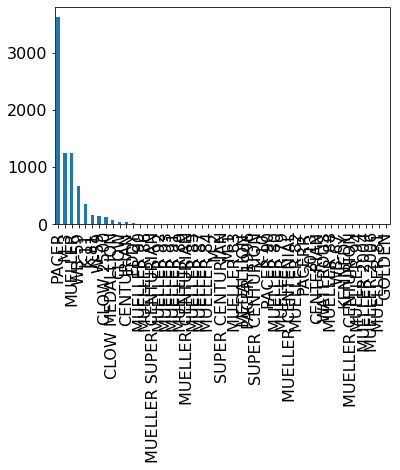

In [36]:
style_counts.plot.bar()

In [37]:
# Grab the top 12 
top12 = style_counts.iloc[:12]

# and them add an index to our Series for the sum of all the "other" for 
top12["other"] = style_counts.iloc[12:].sum()

Text(0.5, 0, 'Hydrant Type')

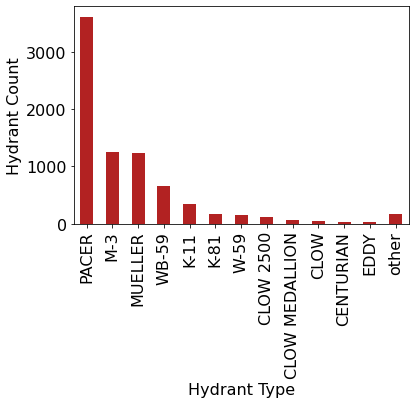

In [38]:
# Plot the results
ax = top12.plot.bar(color = "firebrick")
ax.set_ylabel("Hydrant Count")
ax.set_xlabel("Hydrant Type")

### In what *decade* were *pacers manufactured*?
### Take a peek at the *Style* column data

In [39]:
hdf["Style"]

0        Pacer
1        Pacer
2        Pacer
3        Pacer
4        Pacer
         ...  
10104      NaN
10105      NaN
10106      NaN
10107      NaN
10108      NaN
Name: Style, Length: 10109, dtype: object

### Which *column* gives *year* information?

In [40]:
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### How to get the *year_manufactured* for *pacers* and *others*?

In [41]:
# Let's get the year manufactured for all of the "Pacer" hydrants.
pacer_years = hdf[hdf["Style"] == "Pacer"]["year_manufactured"]

# Note: We can do this either way
# pacer_years = hdf["year_manufactured"][hdf["Style"] == "Pacer"]

pacer_years

0        1996.0
1        1995.0
2        1996.0
3        1995.0
4        1996.0
          ...  
10050    2017.0
10051    2017.0
10052    2017.0
10053    2017.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [42]:
# then do the same for all the other data
other_years = hdf["year_manufactured"][hdf["Style"] != "Pacer"]
other_years

18       1987.0
22       1996.0
23       1996.0
71       1987.0
72       1987.0
          ...  
10104    2018.0
10105    2017.0
10106    2000.0
10107    2017.0
10108       NaN
Name: year_manufactured, Length: 6651, dtype: float64

### How to get the *decade* for *pacers*?

In [43]:
# Round each year down to the start of the decade.
# e.g. 1987 --> 1980, 2003 --> 2000
pacer_decades = (pacer_years // 10 * 10)
pacer_decades

0        1990.0
1        1990.0
2        1990.0
3        1990.0
4        1990.0
          ...  
10050    2010.0
10051    2010.0
10052    2010.0
10053    2010.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

### How to convert the *decades* back to *int*?
- `astype(...)` method
- `dropna(...)` method

In [44]:
# Drop the NaN values, convert to int, and do value counts
pacer_decades = pacer_decades.dropna()
pacer_decades = pacer_decades.astype(int).value_counts()
pacer_decades

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

### How to *count the decades* for pacers?

In [45]:
pacer_decades_count = pacer_decades.value_counts()
pacer_decades_count

1730    1
846     1
503     1
21      1
1       1
Name: year_manufactured, dtype: int64

### Count the *decades* for others.

In [46]:
# Do the same thing for other_years. Save to a variable called "other_decades"
other_decades = (other_years // 10 * 10).dropna().astype(int)
other_decades_count = other_decades.value_counts()
other_decades_count

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

### Build a DataFrame from a dictionary of key, Series

In [47]:
plot_df = DataFrame({
    "pacer": pacer_decades_count,
    "other": other_decades_count,
})
plot_df # observe the NaN values

,pacer,other
1,1.0,NaN
21,1.0,NaN
503,1.0,NaN
846,1.0,NaN
1730,1.0,NaN
1900,NaN,1.0
1930,NaN,9.0
1940,NaN,68.0
1950,NaN,371.0
1960,NaN,349.0


Text(0, 0.5, 'Hydrant Count')

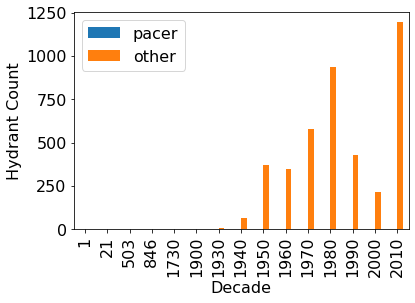

In [48]:
# make a bar plot

ax = plot_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

#### Ignore data from before 1950 using boolean indexing.

Text(0, 0.5, 'Hydrant Count')

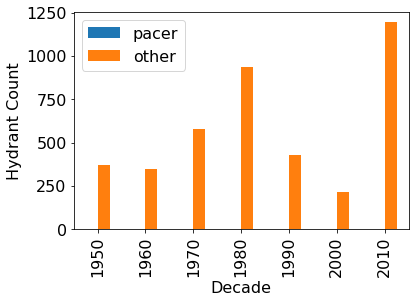

In [49]:
ax = plot_df[plot_df.index >= 1950].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

### Stacked Bar Chart
`stacked` parameter accepts boolean value as argument

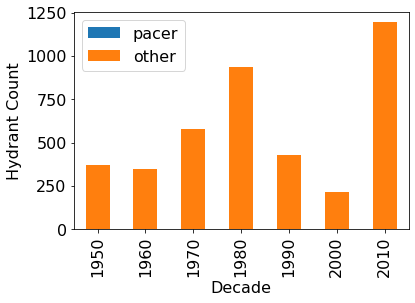

In [50]:
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
None